In [1]:
import Zip
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

#The list of channels in the detector
channels_in_detector = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 'sum_wv': [254], 'busy_on': [255], 'busy_off': [256], 'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

In [2]:
#The calibration data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

In [3]:
# A waveform reader function
def Waveform(eventnr,file):
    event = file.get_single_event(eventnr)
                                
    #The variables that check if a channel is the minimum channel
    adcmin = 16382
    minchannel = 0
    
    #A list that holds all the channels with significant pulses 
    channellist = []
    
    #Create the datapoint arrays
    n = 500000  #350000
    ts = np.ones((n_channels, n), dtype=np.int16)
    ts = ts * 16382 #baseline
    t = np.linspace(0, n, n) 
    
    #Loop over all pulses in the event
    for p in event.pulses:
        ch = p.channel
        i = np.zeros(n_channels, dtype = int)
        #print(p.channel, ": ", p.left, p.right-p.left)
        for adc in p.raw_data:
            
            #Add the ADC value to the appropriate channel array
            ts[ch][p.left + i[ch]] = adc
            i[ch] = i[ch] + 1
            
            #Append all significant main channels to the list
            if adc < 15000 and ch not in channellist and ch in channels_in_detector['tpc']:
                channellist.append(ch)
                
            #Check which channel is the minimum channel
            if adc < adcmin:
                adcmin = adc
                minchannel = ch
                
    #Sort for convenience
    channellist.sort()
    return t, ts, channellist, minchannel


In [14]:
#Select the event number and process the waveform
eventnumber = 505
Input = Waveform(eventnumber,NG)
print(Input[2])
print('The lowest recorded ADC reading for event %i occured in channel %i' % (eventnumber, Input[3]))

[0, 3, 4, 22, 36, 37, 38, 39, 66, 67, 68, 69, 92, 93, 105, 108, 126, 127, 128, 129, 131, 132, 133, 136, 138, 140, 141, 143, 144, 145, 146, 147, 151, 153, 154, 155, 156, 158, 159, 164, 165, 166, 169, 172, 175, 176, 180, 181, 185, 186, 187, 188, 191, 192, 197, 201, 204, 207, 211, 215, 216, 218, 219, 221, 226, 229, 231, 233, 235, 242, 247]
The lowest recorded ADC reading for event 505 occured in channel 38


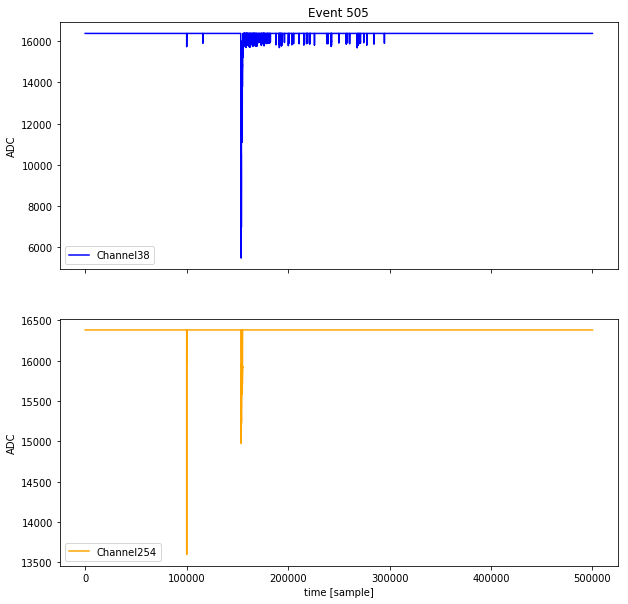

In [15]:
#Select two channels to compare
channel1 = 38
channel2 = 254

#Plot the two channels
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10) # can't be in same cell as import matplotlib 
figs, ax = plt.subplots(2, 1, sharex='col')
ax[0].plot(Input[0], Input[1][channel1], label='Channel' + str(channel1), color = 'blue')
ax[1].plot(Input[0], Input[1][channel2], label='Channel' + str(channel2), color='orange')
ax[0].set_ylabel("ADC")
ax[1].set_ylabel("ADC")
ax[1].set_xlabel("time [sample]")
ax[0].set_title('Event ' + str(eventnumber))
ax[0].legend()
ax[1].legend()
#ax[0].set_xlim(90000,120000)
#ax[1].set_xlim(90000,120000)


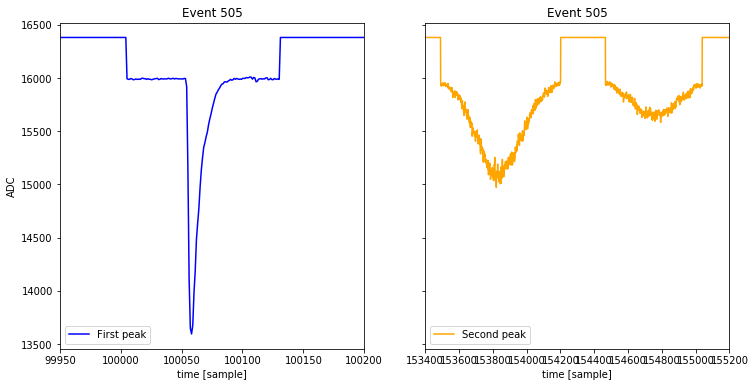

In [18]:
# Zoom in @around the peaks
# Channel 254
%matplotlib inline
figs2, ax2 = plt.subplots(1, 2, sharey = True, figsize = (12., 6.))
ax2[0].plot(Input[0], Input[1][channel2], label='First peak', color = 'blue')
ax2[0].set_xlim(99950, 100200)
ax2[1].plot(Input[0], Input[1][channel2], label='Second peak', color='orange')
ax2[1].set_xlim(153400, 155200)
#ax2[0].set_ylim(14500, 16500)
ax2[0].set_ylabel("ADC")
ax2[0].set_xlabel("time [sample]")
ax2[1].set_xlabel("time [sample]")
ax2[0].set_title('Event ' + str(eventnumber))
ax2[1].set_title('Event ' + str(eventnumber))
ax2[0].legend()
ax2[1].legend()

fname = 'TestFigures/NG' +str(eventnumber) + '_sum.png' #change 'Rn' and 'NG' accordingly
figs2.savefig(fname, dpi = 300)




In [7]:
# storing waveforms (for all PMTs in channellist)
for i in range(len(Input[2])):
    channel1 = Input[2][i]
    if channel1 < 127: #top
        color = 'blue'
    if channel1 >126: #bottom
        color = 'orange'
        
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (10, 10)
    figs, ax = plt.subplots()
    ax.plot(Input[0], Input[1][channel1], label='Channel' + str(channel1), color = color)
    ax.set_ylabel("ADC")
    ax.set_xlabel("time [sample]")
    ax.set_title('Event ' + str(eventnumber))
    ax.legend()
    fname = 'Rn' +str(eventnumber) + '_'+ str(channel1) + '.png' #change 'Rn' and 'NG' accordingly
    figs.savefig(fname, dpi = (200))

### Summed Waveforms

Summed waveform for one event:

In [10]:
eventnumber = 2
Input = Waveform(eventnumber,NG) #NG or Rn220
baseline = 16382
summed_pmt = baseline #baseline as starting point 
# number of PMT's that we loop over (0-126: top, 127-248: bottom)
m = 126

# looping over PMT's
for k in range(m+1):
    data_pmt = Input[1][k]
    summed_pmt -= (baseline - data_pmt)    

Text(0.5,1,'Event 2 -summed PMTs')

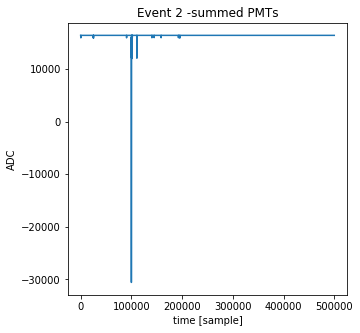

In [11]:
%matplotlib inline
figs, ax = plt.subplots()
figs.set_size_inches(5,5)
ax.plot(Input[0], summed_pmt, label='summed PMTs')
ax.set_ylabel("ADC")
ax.set_xlabel("time [sample]")
ax.set_title('Event ' + str(eventnumber) + ' -summed PMTs')
#ax.set_xlim(90000,120000)
#fname = 'summedPMTs'+ 'NG' + str(eventnumber) + '.png' #change 'Rn' to 'NG' accordingly
#figs.savefig(fname, dpi = (200))

looping over events, storing the summed waveform for each of them: 

In [ ]:
baseline = 16382
m = 126

# looping over eventnumber
for i in range(20):
    summed_pmt = baseline
    eventnumber = i+1 #starting from 1
    Input = Waveform(eventnumber,NG)
    # looping over PMTs
    for k in range(m+1):
        data_pmt = Input[1][k]
        summed_pmt -= (baseline - data_pmt)
        
    %matplotlib inline
    figs, ax = plt.subplots()
    figs.set_size_inches(10,10)
    ax.plot(Input[0], summed_pmt, label='summed PMTs')
    ax.set_title('Event ' + str(eventnumber) + ' -summed PMTs')
    ax.set_ylabel("ADC")
    ax.set_xlabel("time [sample]")
    # ax.set_xlim(90000,120000) 
    fname = 'summedPMTs'+ 'NG' + str(eventnumber) + '.png' #change 'NG', 'Rn' accordingly
    figs.savefig(fname, dpi = (200))     